In [1]:
import numpy as np

In [2]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

In [7]:
import seaborn as sns

In [9]:
df = pd.read_csv('911.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [12]:
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e  
0      REINDEER CT & DEAD END  1  
1  BRIAR PATH & WHITEMARSH LN  1  
2                    HAWS AVE  1  
3          AIRY ST & SWEDE ST  1  
4    CHERRYWOOD CT & DEAD END  1

In [24]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [25]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [30]:
df['title'].nunique()

110

In [38]:
df['Reason'] = df['title'].apply(lambda var: var.split(":")[0])

In [40]:
df['Reason'].value_counts().head()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

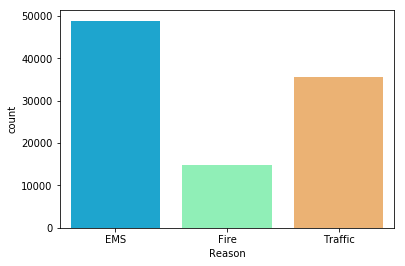

In [42]:
sns.countplot(x='Reason',data=df,palette='rainbow')

In [59]:
type(df['timeStamp'][0])

str

In [60]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [64]:
df['timeStamp'].iloc[0].hour

17

In [66]:
df['Hour'] = df['timeStamp'].apply(lambda var: var.hour)

In [67]:
df['Month'] = df['timeStamp'].apply(lambda var: var.month)

In [73]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [76]:
df['Day of Week'] = df['timeStamp'].apply(lambda var: dmap[var.weekday()])

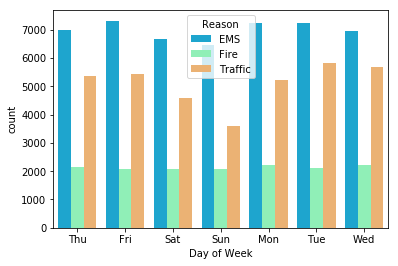

In [80]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='rainbow')

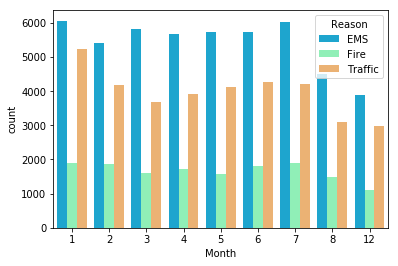

In [81]:
sns.countplot(x='Month',data=df,hue='Reason',palette='rainbow')

In [85]:
df['Month'].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64)

In [162]:
months = df.sort_values(by=['Month'])['Month'].value_counts().tolist()

In [164]:
months.insert(8,0)

In [165]:
months.insert(9,0)

In [166]:
months.insert(10,0)

In [167]:
months

[13205, 12137, 11786, 11467, 11423, 11326, 11101, 9078, 0, 0, 0, 7969]

In [170]:
months

[13205, 12137, 11786, 11467, 11423, 11326, 11101, 9078, 0, 0, 0, 7969]

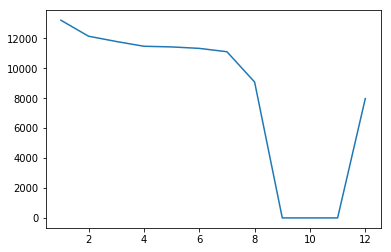

In [173]:
plt.plot(list(range(1,13)),months)

In [175]:
byMonth = df.groupby('Month').count()

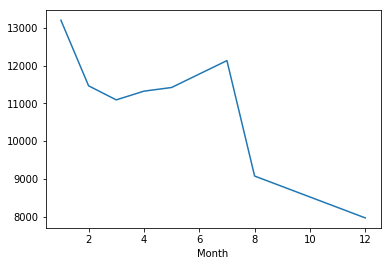

In [178]:
byMonth['twp'].plot()

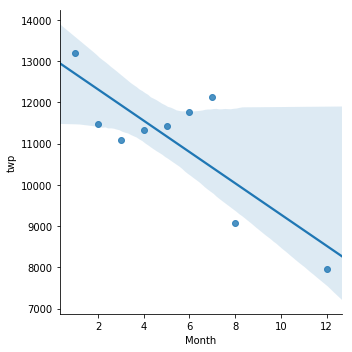

In [180]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [182]:
df['Date'] = df['timeStamp'].apply(lambda var: var.date())

In [183]:
byDate = df.groupby('Date').count()

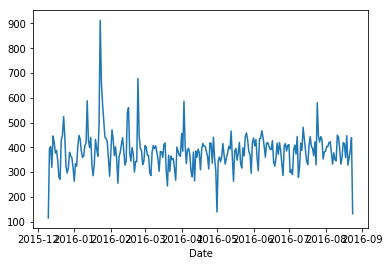

In [184]:
byDate['twp'].plot()

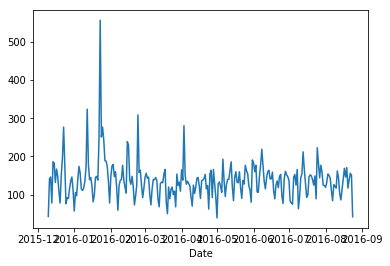

In [189]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()

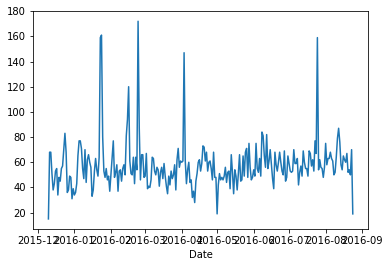

In [190]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()

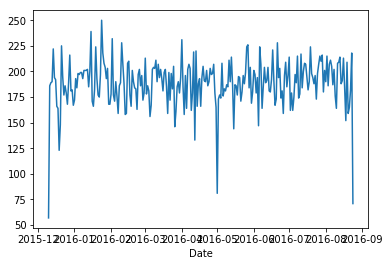

In [191]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()

In [194]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour          0    1    2    3    4    5    6    7    8    9  ...    14   15  \
Day of Week                                                   ...              
Fri          275  235  191  175  201  194  372  598  742  752 ...   932  980   
Mon          282  221  201  194  204  267  397  653  819  786 ...   869  913   
Sat          375  301  263  260  224  231  257  391  459  640 ...   789  796   
Sun          383  306  286  268  242  240  300  402  483  620 ...   684  691   
Thu          278  202  233  159  182  203  362  570  777  828 ...   876  969   

Hour           16    17   18   19   20   21   22   23  
Day of Week                                            
Fri          1039   980  820  696  667  559  514  474  
Mon           989   997  885  746  613  497  472  325  
Sat           848   757  778  696  628  572  506  467  
Sun           663   714  670  655  537  461  415  330  
Thu           935  1013  810  698  617  553  424  354  

[5 rows x 24 columns]

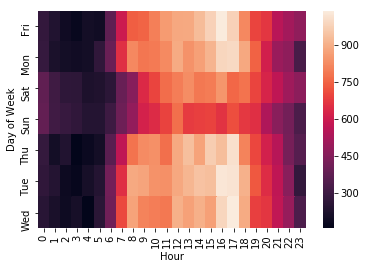

In [195]:
sns.heatmap(dayHour)

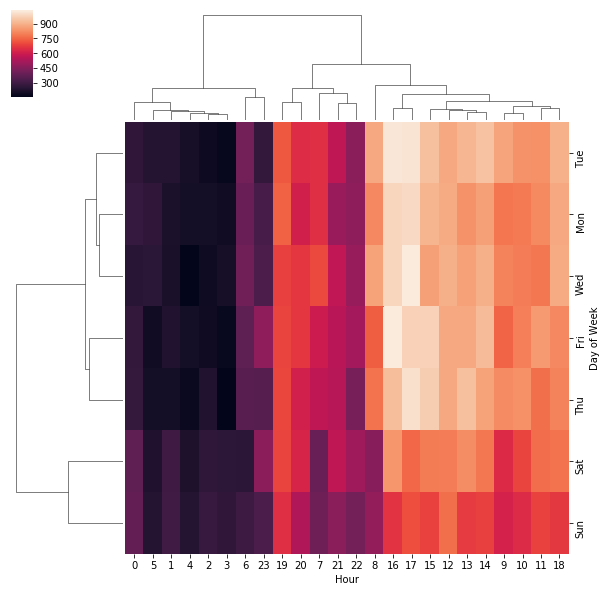

In [196]:
sns.clustermap(dayHour)

In [197]:
monthHour = df.groupby(by=['Month','Hour']).count()['Reason'].unstack()
monthHour.head()

Hour    0    1    2    3    4    5    6    7    8    9  ...    14   15   16  \
Month                                                   ...                   
1      294  218  225  205  205  214  386  551  755  752 ...   775  691  725   
2      267  194  161  149  161  213  325  550  597  603 ...   648  704  692   
3      214  181  194  149  152  181  291  487  556  614 ...   672  707  782   
4      243  204  170  161  179  178  316  482  613  598 ...   705  728  767   
5      255  195  158  173  160  196  254  439  605  644 ...   640  746  728   

Hour    17   18   19   20   21   22   23  
Month                                     
1      871  798  687  592  507  421  345  
2      674  693  578  518  453  426  327  
3      676  600  547  493  402  359  273  
4      728  646  533  472  377  309  282  
5      787  608  510  489  462  405  283  

[5 rows x 24 columns]

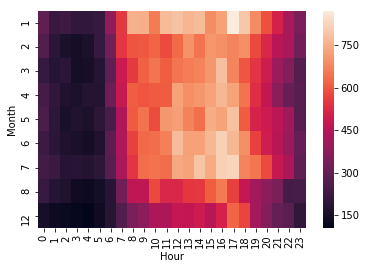

In [198]:
sns.heatmap(monthHour)

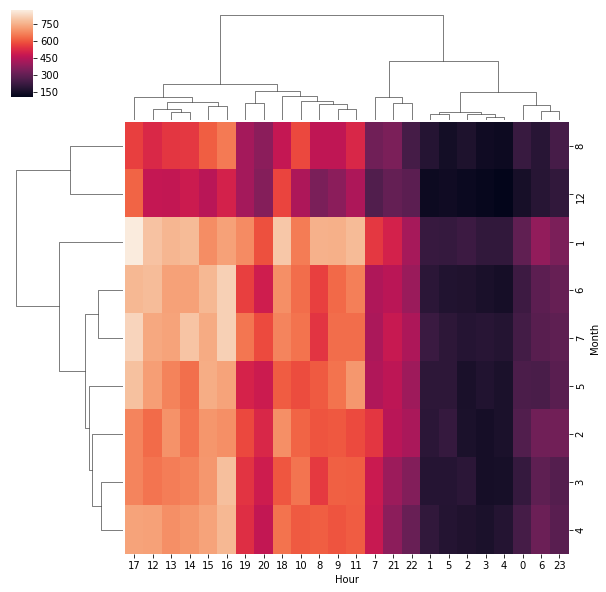

In [199]:
sns.clustermap(monthHour)